# Overview of Problem 

## Aim
Classify fetal health in order to prevent child and maternal mortality. Classified into 3 classes:

- Normal
- Suspect
- Pathological

## Dataset
- 2126 fetal cardiotocograms (CTG) 

### Features

#### Response Variable
- fetal health: 
    - 1= normal
    - 2 = suspect
    - 3= pathological

#### Predictor Variables
- baseline value:Baseline Fetal Heart Rate (FHR)
- accelerations: Number of accelerations per second
- fetal_movement:Number of fetal movements per second
- uterine_contractions: Number of uterine contractions per second
- light_decelerations: per second
- severe_decelerations: per second
- prolongued_decelerations: per second
- abnormal_short_term_variability: Percentage of time with abnormal short term variability 
- mean_value_of_short_term_variability: Mean value of short term variability
- percentage_of_time_with_abnormal_long_term_variability: Percentage of time with abnormal long term variability
- Mean value of long term variability
- histogram_width: Width of the histogram made using all values from a record
- Histogram minimum value
- histogram_max
- histogram_number_of_peaks:Number of peaks in the exam histogram
- histogram_number_of_zeroes: Number of zeroes in the exam histogram
- histogram_mode
- histogram_mean
- histogram_median
- histogram_variance
- Histogram trend

# General Thoughts Before Starting

## Common Algorithms For Multi-Class Classification 
- k-Nearest Neighbors.
- Naive Bayes.
- Decision Trees.
- Ensemble Models: Random Forest.
- Boosting Models: AdaBoost and XGBoost

### Measure of Focus
Common measures used to evaluate the outcome of classification problems include AUC, F1 score, Precision and Recall.

Further, when analysing the data, it is apparent that there is considerable class imbalance and therefore accuracy is not recommended as primary metric.

In this problem, the cost of not correctly identifying risks with child birth (ie. Case 3 of the predictor variable, that being Pathological) is high and there recall for case 3 should be the metric of focus), this measures: for pathological outcomes what proportion of actual positives was identified correctly?


# Importing Packages

In [1]:
%pip install xgboost

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier


from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, precision_score, recall_score

# Initial Loading and Data Analysis

In [3]:
df = pd.read_csv('fetal_health.csv')

In [4]:
print(f"Shape of Dataset: {df.shape}")

Shape of Dataset: (2126, 22)


22 columns (21 predictor variables and 1 response variable) and 2126 rows

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

No missing values

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [7]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [8]:
df.nunique()

baseline value                                             48
accelerations                                              20
fetal_movement                                            102
uterine_contractions                                       16
light_decelerations                                        16
severe_decelerations                                        2
prolongued_decelerations                                    6
abnormal_short_term_variability                            75
mean_value_of_short_term_variability                       57
percentage_of_time_with_abnormal_long_term_variability     87
mean_value_of_long_term_variability                       249
histogram_width                                           154
histogram_min                                             109
histogram_max                                              86
histogram_number_of_peaks                                  18
histogram_number_of_zeroes                                  9
histogra

In [9]:
print("Number of unqiue values by column \n")

for i in df:
    print("{}:".format(i), df[i].nunique(), "unique values \n", df[i].unique(), "\n")

Number of unqiue values by column 

baseline value: 48 unique values 
 [120. 132. 133. 134. 122. 151. 150. 131. 130. 129. 128. 124. 115. 114.
 116. 158. 156. 148. 149. 146. 144. 142. 136. 141. 138. 140. 154. 145.
 139. 125. 123. 159. 143. 119. 121. 127. 126. 118. 135. 137. 147. 157.
 117. 152. 112. 106. 110. 160.] 

accelerations: 20 unique values 
 [0.    0.006 0.003 0.007 0.001 0.005 0.009 0.002 0.008 0.004 0.01  0.015
 0.013 0.014 0.011 0.017 0.012 0.016 0.019 0.018] 

fetal_movement: 102 unique values 
 [0.    0.072 0.222 0.408 0.38  0.441 0.383 0.451 0.469 0.34  0.425 0.334
 0.135 0.099 0.108 0.112 0.089 0.103 0.085 0.109 0.079 0.065 0.055 0.058
 0.047 0.038 0.012 0.018 0.02  0.005 0.003 0.006 0.001 0.004 0.009 0.01
 0.002 0.008 0.007 0.028 0.026 0.107 0.013 0.016 0.029 0.05  0.053 0.011
 0.015 0.022 0.021 0.017 0.019 0.025 0.014 0.024 0.023 0.035 0.054 0.03
 0.048 0.088 0.043 0.052 0.091 0.033 0.092 0.084 0.115 0.041 0.04  0.027
 0.031 0.063 0.06  0.071 0.306 0.298 0.139 0.189 0.

## Setting Target Variable (Initial Loading and Data Analysis)

In [10]:
#axis = 0 to drop labels from the index oe axis=1 to drop labels from columns
X=df.drop(['fetal_health'],axis=1)
y= df.fetal_health

## EDA

### Analysing Target Variable

Breakdown of unique values:
 1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64


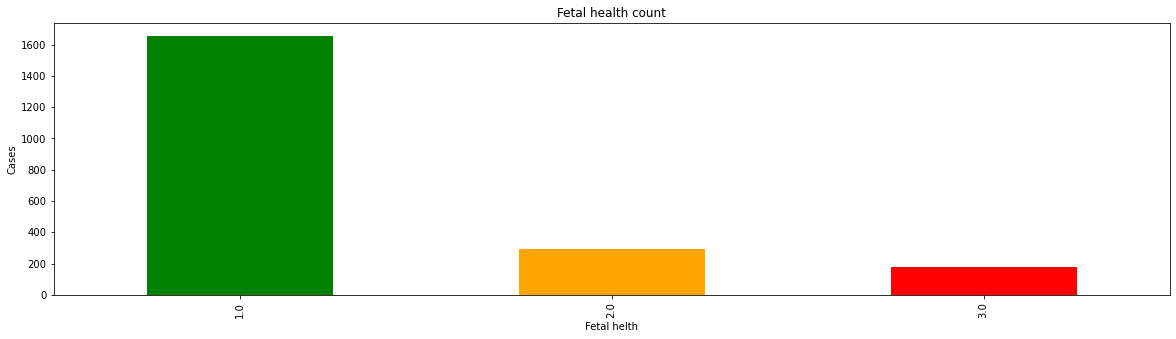

In [11]:
vis_fetal_health = y.value_counts().plot(figsize=(20, 5), kind="bar", color = ["green", "orange", "red"])
plt.title("Fetal health count")
plt.xlabel("Fetal helth")
plt.ylabel("Cases")


#Counting labels
print("Breakdown of unique values:\n",y.value_counts())

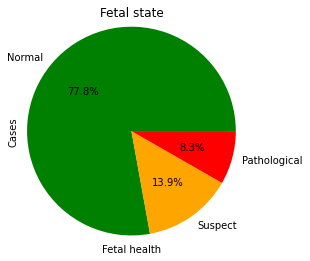

In [12]:
plt.title("Fetal state")

plt.pie(y.value_counts(),labels=["Normal", "Suspect", "Pathological"], colors = ["green", "orange", "red"],autopct="%1.1f%%",radius=1.2)
plt.xlabel("Fetal health")
plt.ylabel("Cases")
plt.show()

#### Discussion on target variable
This is an imbalanced dataset (78% of observations are 'Normal'). This means we have to be careful on our evaluation metric, in which the metric accuracy (Total correct/ total) is misleading. 
- For example: Imagine if we classified all the data as 0 (ie. Normal). Our accuracy would be 78%.

For this reason and for the fact the identifying case 3 when it occurs (ie. high recall) is of significant importance, we will use recall for case 3 as are primary evaluation metric.

Other metrics of importance include the F1 score (precision and recall) and recall for case 2 ('Suspect') as misclassified suspect cases (in particularlty if they are misclassified as 'normal') can lead to the missing of 'pathological' issues

### Correlation

<AxesSubplot:>

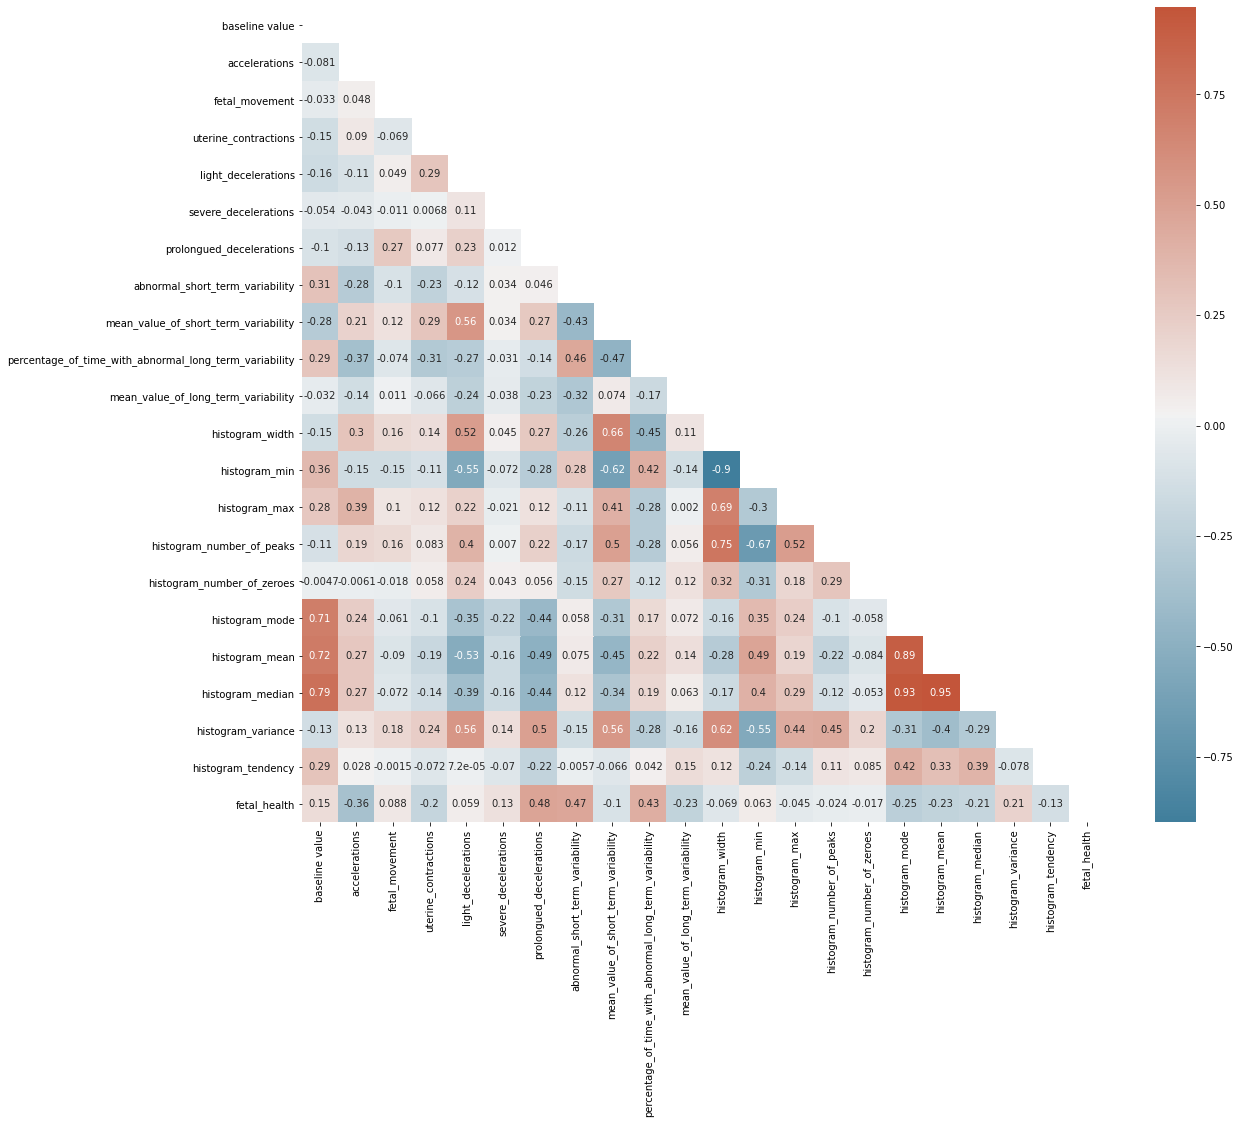

In [13]:
# Correlation between different variables
corr = df.corr()
# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(18, 15))
# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

#### Discussion on Correlation
- histogram mode, mean and median are highly correlated (obvious reasons), they are also correlated with the baseline value. This correlation is analysed below.
- Target variable: 
    - positive correlation: prolongued_decelerations, abnormal_short_term_variability, percentage_of_time_with_abnormal_long_term_variability
    - negative correlation: accelerations
    - the target variable correlations are analyses below this section

## Predictor Variable Correlations
Histogram mean, mode, median and baseline value

<AxesSubplot:xlabel='histogram_mean', ylabel='histogram_median'>

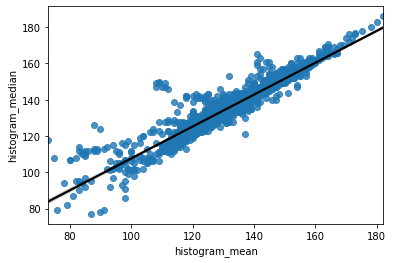

In [14]:
sns.regplot(x=df['histogram_mean'], y=df['histogram_median'], line_kws={"color":'black'})

<AxesSubplot:xlabel='histogram_mean', ylabel='histogram_mode'>

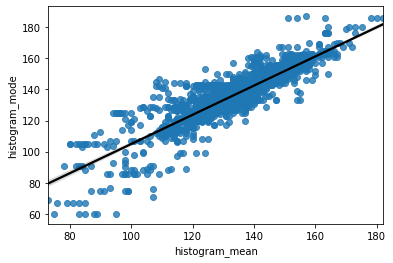

In [15]:
sns.regplot(x=df['histogram_mean'], y=df['histogram_mode'], line_kws={"color":'black'})

<AxesSubplot:xlabel='baseline value', ylabel='histogram_mode'>

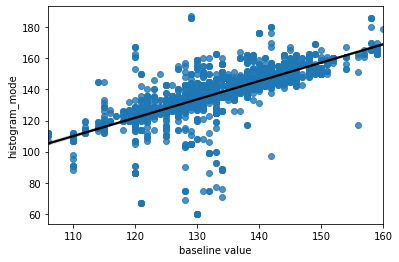

In [16]:
sns.regplot(x=df['baseline value'], y=df['histogram_mode'], line_kws={"color":'black'})

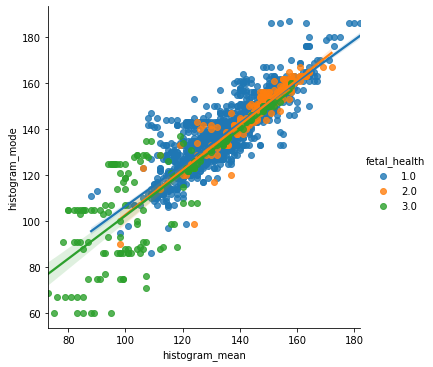

In [17]:
sns.lmplot(x='histogram_mean', y='histogram_mode', hue='fetal_health', data=df)

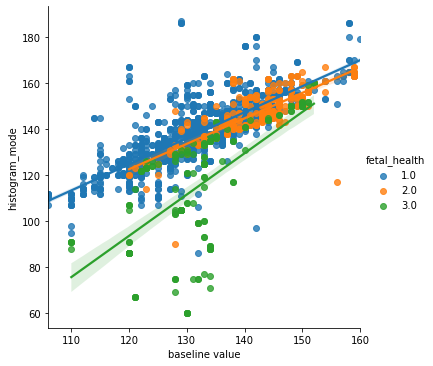

In [18]:
sns.lmplot(x='baseline value', y='histogram_mode', hue='fetal_health', data=df)

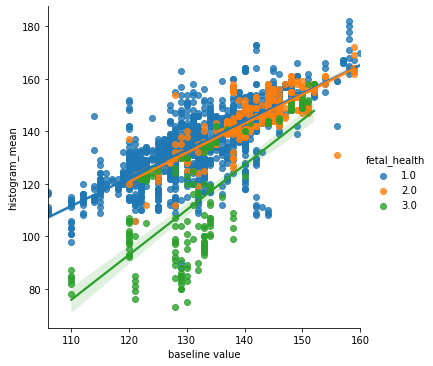

In [19]:
sns.lmplot(x='baseline value', y='histogram_mean', hue='fetal_health', data=df)

The histogram mean, median and mode are highly correlated, we have removed all except one (mode).

Although mode and baseline are correlated (71%) we have kept the two variables as they vary when the mode is small (as shown above)

## Target Variable Correlation

In [20]:
Pos_Num_feature = df.corr()["fetal_health"].sort_values(ascending=False).to_frame()
Neg_Num_feature = df.corr()["fetal_health"].sort_values(ascending=True).to_frame()

In [21]:
Pos_Num_feature[1:6], Neg_Num_feature[0:5]

(                                                    fetal_health
 prolongued_decelerations                                0.484859
 abnormal_short_term_variability                         0.471191
 percentage_of_time_with_abnormal_long_term_vari...      0.426146
 histogram_variance                                      0.206630
 baseline value                                          0.148151,
                                      fetal_health
 accelerations                           -0.364066
 histogram_mode                          -0.250412
 histogram_mean                          -0.226985
 mean_value_of_long_term_variability     -0.226797
 histogram_median                        -0.205033)

In [22]:
#Correlation b/w all features and Target Variable
Pos_Num_feature[1:], Neg_Num_feature

(                                                    fetal_health
 prolongued_decelerations                                0.484859
 abnormal_short_term_variability                         0.471191
 percentage_of_time_with_abnormal_long_term_vari...      0.426146
 histogram_variance                                      0.206630
 baseline value                                          0.148151
 severe_decelerations                                    0.131934
 fetal_movement                                          0.088010
 histogram_min                                           0.063175
 light_decelerations                                     0.058870
 histogram_number_of_zeroes                             -0.016682
 histogram_number_of_peaks                              -0.023666
 histogram_max                                          -0.045265
 histogram_width                                        -0.068789
 mean_value_of_short_term_variability                   -0.103382
 histogram

#### Discussion on Target Variable Correlation
Based on above correlation, let's analyse these further:
- prolongued_decelerations: 0.484859 correlation
- abnormal_short_term_variability: 0.471191 correlation
- percentage_of_time_with_abnormal_long_term_variance: 0.426146 correlation
- accelerations: -0.364066 correlation

### Graphing Prominant Variables

### Discrete Variables that are highly correlated to fetal health

#### Prolongued Decelerations

In [23]:
counts_df = df.groupby(["prolongued_decelerations", "fetal_health"])["fetal_health"].count().unstack()
# Transpose so fetal_health categories add up to 1, divide by the total number (transposed), then transpose one more time for plotting
fetal_health_percents_df = counts_df.T.div(counts_df.T.sum()).T

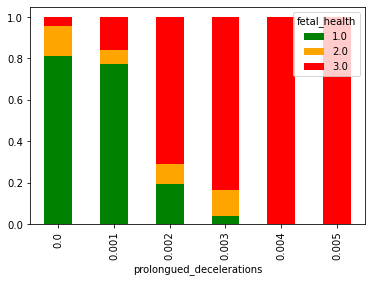

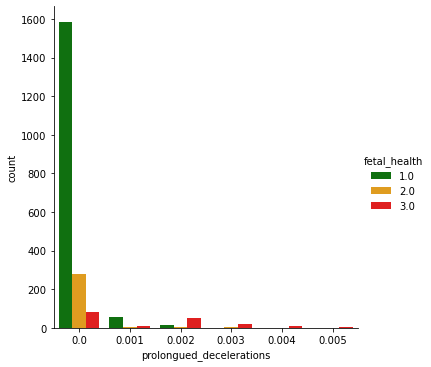

In [24]:
fig, ax = plt.subplots()


fetal_health_percents_df.plot(kind="bar", stacked=True, color=["green", "orange","red"], ax=ax)

sns.catplot(x="prolongued_decelerations", hue="fetal_health", data=df, kind="count", palette=sns.color_palette(['green', 'orange','red'])
             )


Majority of prolongued decelerations are 0.0, when higher, there is high occurance of pathological fetal health

### Continous Variables that are highly correlated to fetal health

#### abnormal_short_term_variability

<AxesSubplot:xlabel='fetal_health', ylabel='abnormal_short_term_variability'>

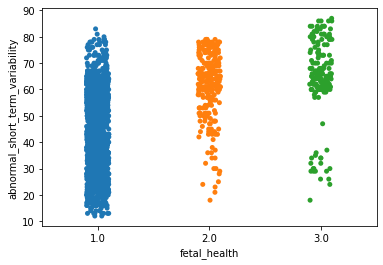

In [25]:
sns.stripplot(x="fetal_health", y="abnormal_short_term_variability", data=df)

#### percentage_of_time_with_abnormal_long_term_variance

<AxesSubplot:xlabel='fetal_health', ylabel='percentage_of_time_with_abnormal_long_term_variability'>

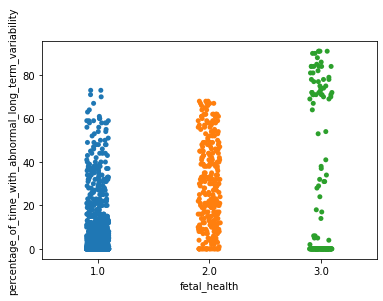

In [26]:
sns.stripplot(x="fetal_health", y="percentage_of_time_with_abnormal_long_term_variability", data=df)

Although abnormal long term variability is somewhat spread for case 3. When above 80, all observations are case 3

#### Accelerations

<AxesSubplot:xlabel='fetal_health', ylabel='accelerations'>

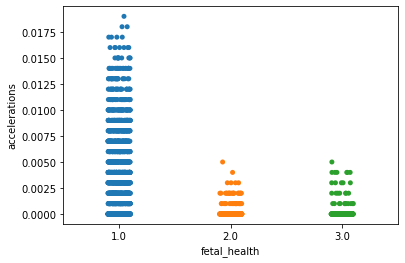

In [27]:
sns.stripplot(x="fetal_health", y="accelerations", data=df)

High accelerations good for fetal health

### Distribution of All Variables

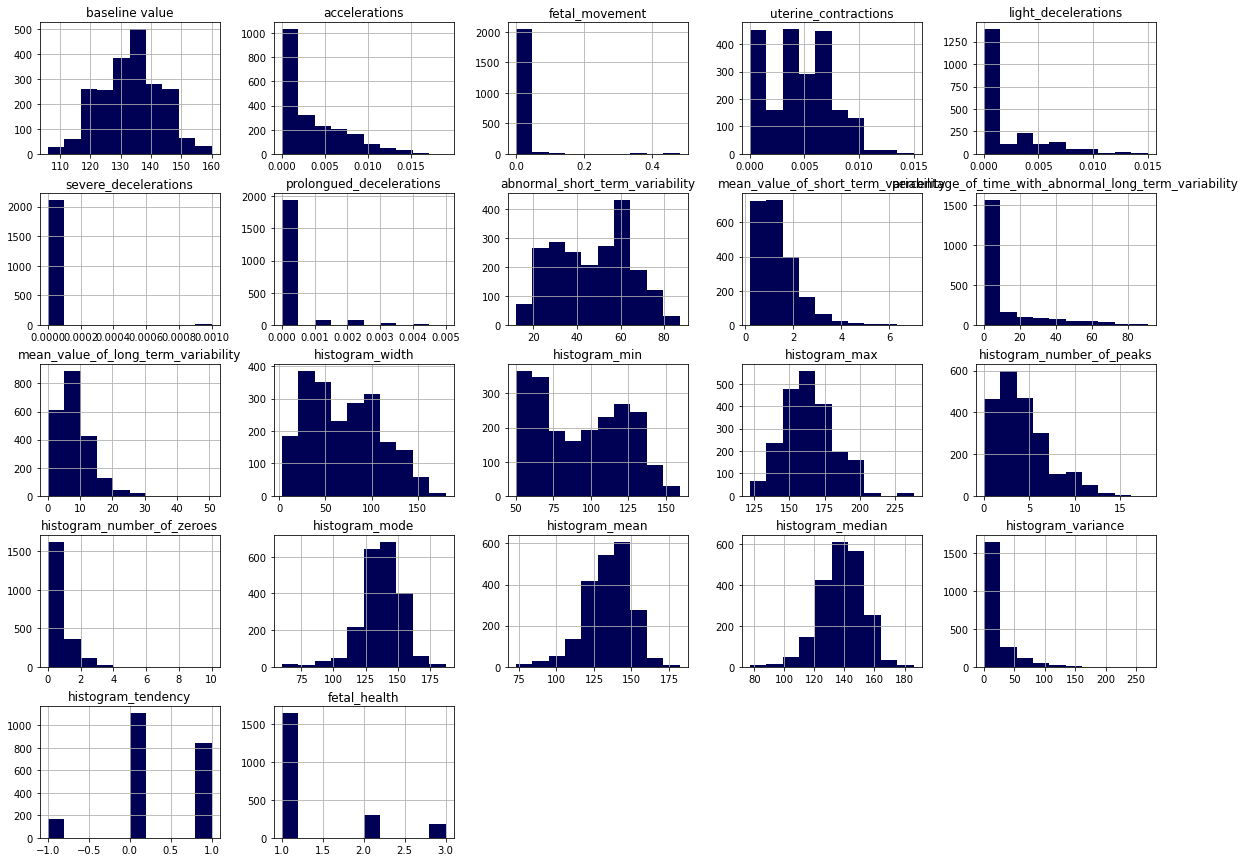

In [28]:
df_hist_plot = df.hist(figsize = (20,15), color = "#000054")

- Three types of skewed distributions. A right (or positive) skewed distribution, left (or negative) skewed distribution, and normal distribution.

    - A left-skewed distribution (negatively-skewed) has a long left tail.
    - A right-skewed distribution (positively-skewed) has a long right tail
    - The skewness for a normal distribution is zero and looks a bell curve.

#### Histogram Variance Outliers
Outliers are present in Histogram Variance, let's have a closer look at these

In [29]:
df[df['histogram_variance'] > 180]

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
6,134.0,0.001,0.000,0.013,0.008,0.0,0.003,29.0,6.3,0.0,...,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0
1751,134.0,0.004,0.001,0.001,0.004,0.0,0.003,60.0,1.6,0.0,...,71.0,184.0,7.0,0.0,89.0,118.0,113.0,195.0,-1.0,3.0
1752,134.0,0.004,0.001,0.001,0.003,0.0,0.003,61.0,1.8,0.0,...,66.0,184.0,6.0,0.0,88.0,112.0,111.0,182.0,-1.0,3.0
1905,130.0,0.001,0.000,0.012,0.013,0.0,0.000,62.0,2.0,0.0,...,50.0,177.0,7.0,0.0,60.0,95.0,112.0,269.0,0.0,3.0
1906,130.0,0.001,0.001,0.012,0.010,0.0,0.001,62.0,2.2,0.0,...,50.0,211.0,9.0,0.0,60.0,89.0,113.0,250.0,0.0,3.0
1907,130.0,0.002,0.002,0.009,0.009,0.0,0.002,63.0,2.3,0.0,...,50.0,211.0,5.0,0.0,60.0,88.0,113.0,254.0,-1.0,3.0
1908,130.0,0.002,0.002,0.008,0.008,0.0,0.002,64.0,2.4,0.0,...,50.0,211.0,8.0,0.0,60.0,85.0,112.0,243.0,-1.0,3.0
1909,130.0,0.002,0.002,0.008,0.008,0.0,0.002,64.0,2.5,0.0,...,50.0,211.0,7.0,0.0,60.0,83.0,114.0,241.0,-1.0,3.0
1910,130.0,0.000,0.002,0.007,0.007,0.0,0.002,66.0,2.4,0.0,...,50.0,211.0,7.0,0.0,60.0,75.0,108.0,190.0,-1.0,3.0


Removing outliers is risky as they may contain valuable information about the data. Here we can see that extreme vairance for Histogram Variance largely correlate with fetal health being pathological, therefore we will keep these outliers.

## Looking at the range of values

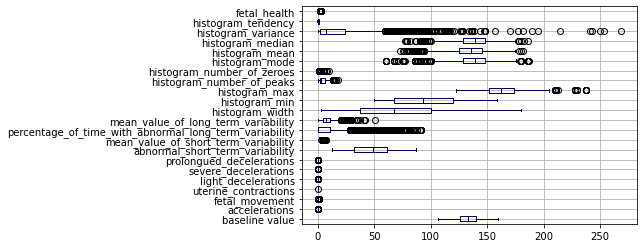

In [30]:
df_box_plot = df.boxplot(vert=False, color = "#000054")

The above plot shows the range of our feature attributes. All the features are in different ranges. To fit this dataset in a KNN model we must scale it to the same range. This is not required for decision trees and Ensemble methods as they are not sensitive to the the variance in the data.

# Feature Eng

In [31]:
#Keeping Histogram mode out of the 3 highly correlated variables, reasons discussed above
X = X.drop(['histogram_median'],axis=1)
X = X.drop(['histogram_mean'],axis=1)

In [32]:
X.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_variance,histogram_tendency
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,73.0,1.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,12.0,0.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,13.0,0.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,13.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,11.0,1.0


## Spliting Train/Test

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, random_state=1, stratify = y)

In [34]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1700, 19), (426, 19), (1700,), (426,))

## Dealing with Missing Data

No missing values so imputation/ dropping features not required

### Normalize Data
Reasons discussed above in the graph of boxplots
Note: Decision trees and ensemble methods do not require feature scaling to be performed as they are not sensitive to the the variance in the data.

In [35]:
scaler = MinMaxScaler()

In [36]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Training

## Selecting Models

### MODEL 1: k-Nearest Neighbors

In [37]:
knn_classification = KNeighborsClassifier(n_neighbors = 3)

# fit the model using fit() on train data
# Used scaled data for KNN
knn_model = knn_classification.fit(scaled_X_train, Y_train)

In [38]:
knn_pred = knn_model.predict(scaled_X_test)


In [39]:
print(classification_report(Y_test,knn_pred))

              precision    recall  f1-score   support

         1.0       0.93      0.98      0.96       332
         2.0       0.77      0.63      0.69        59
         3.0       0.93      0.77      0.84        35

    accuracy                           0.92       426
   macro avg       0.88      0.79      0.83       426
weighted avg       0.91      0.92      0.91       426



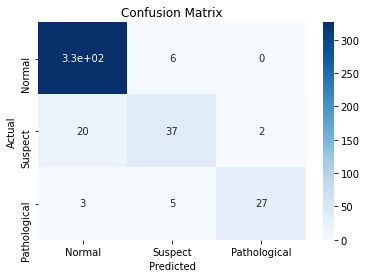

In [40]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, knn_pred), annot=True, ax = ax, cmap = "Blues");

ax.set_xlabel("Predicted");
ax.set_ylabel("Actual"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);
ax.yaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

77% recall for case of focus (3) and overpredicting case 1 as shown through high accuracy but low precision and recall for classes that are underrepresented in the data (imbalance in dataset). Although recall for case 2 is not the prominant metric of focus, it is important especially if this misclassification is being classified as normal as the cost of missing ill fetal health it high (which it is misclassified as normal in 91% of its false positives).

###  MODEL 2: Decision Tree

In [41]:
decisionTreeClassifier = DecisionTreeClassifier()

In [42]:
decisionTreeClassifier.fit(X_train,Y_train)

DecisionTreeClassifier()

In [43]:
decisionTreeClassifier_pred = decisionTreeClassifier.predict(X_test)

In [44]:
print(classification_report(Y_test,decisionTreeClassifier_pred))

              precision    recall  f1-score   support

         1.0       0.95      0.94      0.95       332
         2.0       0.75      0.81      0.78        59
         3.0       0.88      0.86      0.87        35

    accuracy                           0.92       426
   macro avg       0.86      0.87      0.87       426
weighted avg       0.92      0.92      0.92       426



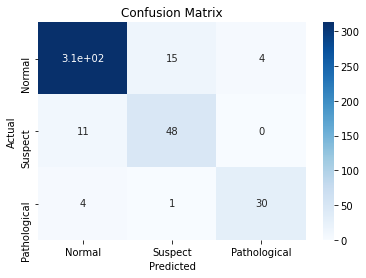

In [45]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, decisionTreeClassifier_pred), annot=True, ax = ax, cmap = "Blues");

ax.set_xlabel("Predicted");
ax.set_ylabel("Actual"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);
ax.yaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

Recall for case 3 is stronger (87%) and recall for case 2 has improved (81%).

As decision trees are prone to overfitting, let's see if random forest can improve this score

###  MODEL 3: Random Forest (Bagging Ensemble Method)

RF algorithm is an ensemble method that uses multiple weak learners (ie. decision trees) and aggregates then up (bagging -> boostrapping + aggregation) to vote on the outcome of each prediction -> idea here is to reduce overfitting 

In [46]:
rfc = RandomForestClassifier()

In [47]:
rfc.fit(X_train,Y_train)

RandomForestClassifier()

In [48]:
rfc_pred = rfc.predict(X_test)

In [49]:
print(classification_report(Y_test,rfc_pred))

              precision    recall  f1-score   support

         1.0       0.95      0.99      0.97       332
         2.0       0.93      0.71      0.81        59
         3.0       0.94      0.94      0.94        35

    accuracy                           0.95       426
   macro avg       0.94      0.88      0.91       426
weighted avg       0.95      0.95      0.94       426



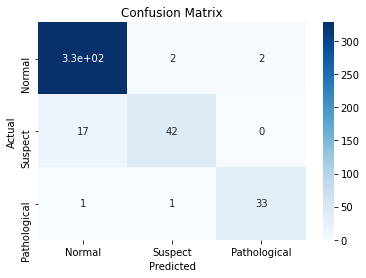

In [50]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, rfc_pred), annot=True, ax = ax, cmap = "Blues");

ax.set_xlabel("Predicted");
ax.set_ylabel("Actual"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);
ax.yaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

Recall for class 3 has improved as well at the overall f1 score.
Let's try a second type of ensemble method, Boosting, we will look at AdaBoost (uses stumps as weak learners) and XGBoost

###  MODEL 4: AdaBoost (Boosting Ensemble Method 1)

#### Build weak learner

In [51]:
#n_estimators -> the number of weak learner we are going to use.
#building the weak learners
base_estimator = DecisionTreeClassifier(criterion='entropy', max_depth=1)
AdaBoost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=400, learning_rate=1)

In [52]:
AdaBoostModel = AdaBoost.fit(X_train, Y_train)

In [53]:
ada_pred = AdaBoostModel.predict(X_test)

In [54]:
print(classification_report(Y_test,ada_pred))

              precision    recall  f1-score   support

         1.0       0.94      0.93      0.93       332
         2.0       0.66      0.71      0.68        59
         3.0       0.97      0.91      0.94        35

    accuracy                           0.90       426
   macro avg       0.86      0.85      0.85       426
weighted avg       0.90      0.90      0.90       426



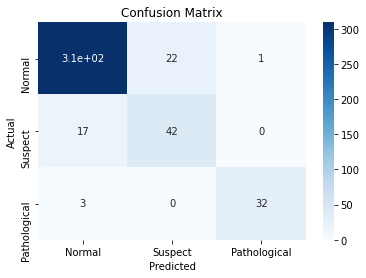

In [55]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, ada_pred), annot=True, ax = ax, cmap = "Blues");

ax.set_xlabel("Predicted");
ax.set_ylabel("Actual"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);
ax.yaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

Case 3 recall is solid (91%).

In saying this, it is important to note that Recall for case 2 is poor (71%), although this is not the main metric of focus it is important as looking at the confusion matrix 100% False Negatives for 'Suspect' are incorrectly classified as 'Normal'. The issue here is 'Suspect' classifications give a call to action to doctors to look further at risks with child birth, so misclassifying them as Pathological would be prefered over misclassification of 'Normal'.

Let's try another ensemble boosting method (XGBoost)

###  MODEL 5: XGBoost (Boosting Ensemble Method 2)

In [56]:
XGB = XGBClassifier()
XGB_Model = XGB.fit(X_train,Y_train)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:53:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [57]:
XGB_pred = XGB_Model.predict(X_test)

In [58]:
print(classification_report(Y_test,XGB_pred))

              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       332
         2.0       0.90      0.80      0.85        59
         3.0       0.94      0.94      0.94        35

    accuracy                           0.95       426
   macro avg       0.94      0.91      0.92       426
weighted avg       0.95      0.95      0.95       426



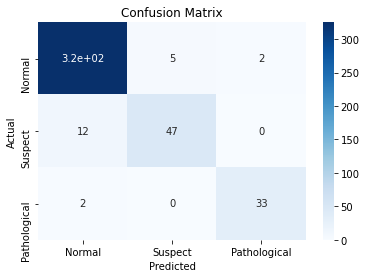

In [59]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, XGB_pred), annot=True, ax = ax, cmap = "Blues");

ax.set_xlabel("Predicted");
ax.set_ylabel("Actual"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);
ax.yaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

Again recall for case 3 is strong (94%) but also recall for case 2 is higher than random forest (80%), the importance of this is discussed above, reducing the amount of false negatives being classified as normal.

# Summary

XGBoost scores the highes for recall on outcome 3 (94%). This is important as identifying Pathological cases is the most important outcome in this problem (in order to prevent child and maternal mortality).

Further, a lot of models were scoring in the 80-90% range for case 3 recall but scoring poorly for case 2 recall (60-70% range), largely misclassifying these instances as 'Normal'. It is important to have strong recall for case 2 as it acts as an alarm/call to action for doctors to look further.

Therefore XGBoost is the best model for this problem.